In [1]:
import pandas as pd

In [2]:
df = pd.read_json('cleaned.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19550 entries, 1 to 20215
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           19550 non-null  object
 1   abstract        19550 non-null  object
 2   classification  19550 non-null  object
 3   year            19550 non-null  int64 
 4   month           19550 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 916.4+ KB


In [3]:
def get_clf_types(x):
    return [e['@type'] for e in x]

In [4]:
df['classification'].iloc[1]

[{'@type': 'CPXCLASS',
  'classification': [{'classification-code': '522',
    'classification-description': 'Gas Fuels'},
   {'classification-code': '723.5',
    'classification-description': 'Computer Applications'},
   {'classification-code': '802.2',
    'classification-description': 'Chemical Reactions'},
   {'classification-code': '802.3',
    'classification-description': 'Chemical Operations'},
   {'classification-code': '803',
    'classification-description': 'Chemical Agents and Basic Industrial Chemicals'},
   {'classification-code': '804',
    'classification-description': 'Chemical Products Generally'},
   {'classification-code': '804.1',
    'classification-description': 'Organic Compounds'}]},
 {'@type': 'ENCOMPASSCLASS',
  'classification': [{'classification-code': '306.5.1',
    'classification-description': 'Petroleum Refining and Petrochemicals; Specialty Products; Manufactured Gases'},
   {'classification-code': '306.6.1',
    'classification-description': 'Petrole

In [5]:
df['classification'].map(get_clf_types).explode().value_counts()

classification
ASJC              19550
SUBJABBR          19550
EMCLASS            6147
FLXCLASS           5491
CPXCLASS           5429
CABSCLASS          1660
GEOCLASS           1298
ENCOMPASSCLASS      462
Name: count, dtype: int64

In [6]:
df.shape[0]

19550

In [7]:
def extract(row):
    filtered = [e['classification'] for e in row if e['@type'] == 'SUBJABBR'][0]
    if not filtered:
        return pd.DataFrame()
    if isinstance(filtered, list):
        return [e['$'] for e in filtered]
    return [filtered]

In [8]:
df['classification'] = df['classification'].map(extract)

<Axes: xlabel='year,month'>

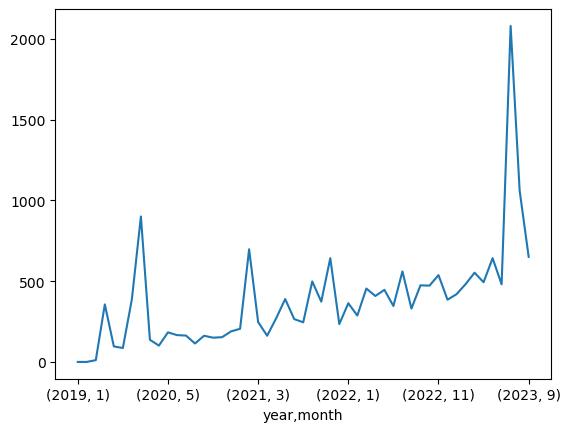

In [9]:
df.groupby(["year", "month"]).size().plot()

In [10]:
df

,title,abstract,classification,year,month
1,Flexible Printed Active Antenna for Digital Te...,"© 2018 The Institute of Electronics, Informati...","[ENGI, MATE]",2020,2
2,Parametric study of hydrogen production via so...,© 2018 Elsevier LtdComputational fluid dynamic...,"[CHEM, CENG, ENGI]",2021,2
3,Superhydrophobic coating from fluoroalkylsilan...,© 2018 Elsevier B.V. A superhydrophobic/supero...,"[CHEM, PHYS, MATE]",2021,7
4,Electrochemical impedance-based DNA sensor usi...,© 2018 Elsevier B.V. A label-free electrochemi...,"[CHEM, BIOC, ENVI]",2020,2
5,Evaluation of outsourcing transportation contr...,"© 2018, Czestochowa University of Technology. ...",[BUSI],2021,2
...,...,...,...,...,...
20211,Long-chain bio-olefins production via oxidativ...,© 2021 Elsevier B.V.Long-chain α-olefins (≥ C1...,"[CENG, CHEM]",2023,7
20212,Recent Developments and Applications of Microf...,"© 2021 Taylor & Francis Group, LLC.Nowadays, f...",[CHEM],2023,2
20213,"Social justice, education and peacebuilding: c...",© 2021 The Author(s). Published by Informa UK ...,[SOCI],2023,6
20214,Effects of black soldier fly (Hermetia illucen...,© 2021 Taylor & Francis.The effects of replaci...,"[ENVI, AGRI]",2023,3


In [11]:
df_scraped = pd.read_json('scrap_data.json')

In [12]:
print(df_scraped["date_delivered"].iloc[-5:].to_string())

1221    [Submitted on 16 Apr 2024 (v1), last revised 2...
1222    [Submitted on 21 Apr 2024 (v1), last revised 2...
1223    [Submitted on 25 Apr 2024 (v1), last revised 2...
1224    [Submitted on 30 Apr 2024 (v1), last revised 2...
1225    [Submitted on 1 May 2024 (v1), last revised 2 ...


In [13]:
idx = pd.IndexSlice
df_scraped_dates = (
    df_scraped["date_delivered"]
    .str.extractall(
        r"(\d{1,2}) (Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) (\d{4})"
    )
    .groupby(level=0)
    .first()
)

In [14]:
df_scraped_dates = df_scraped_dates.iloc[:, [2, 1]]

In [15]:
df_scraped_dates.columns = ["year", "month"]

In [16]:
df_scraped_dates['month'] = df_scraped_dates['month'].map({
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12,
})

In [17]:
df_scraped[['year','month']] = df_scraped_dates 

In [18]:
df_all = pd.concat(
    [
        df,
        df_scraped.drop(columns="date_delivered").rename(
            columns={"citation_title": "title"}
        ),
    ],
    ignore_index=True,
)

In [19]:
df_all

,title,abstract,classification,year,month
0,Flexible Printed Active Antenna for Digital Te...,"© 2018 The Institute of Electronics, Informati...","[ENGI, MATE]",2020,2
1,Parametric study of hydrogen production via so...,© 2018 Elsevier LtdComputational fluid dynamic...,"[CHEM, CENG, ENGI]",2021,2
2,Superhydrophobic coating from fluoroalkylsilan...,© 2018 Elsevier B.V. A superhydrophobic/supero...,"[CHEM, PHYS, MATE]",2021,7
3,Electrochemical impedance-based DNA sensor usi...,© 2018 Elsevier B.V. A label-free electrochemi...,"[CHEM, BIOC, ENVI]",2020,2
4,Evaluation of outsourcing transportation contr...,"© 2018, Czestochowa University of Technology. ...",[BUSI],2021,2
...,...,...,...,...,...
20771,How Deep Networks Learn Sparse and Hierarchica...,Understanding what makes high-dimensional data...,NaN,2024,4
20772,Cumulative Hazard Function Based Efficient Mul...,Most existing temporal point process models ar...,NaN,2024,4
20773,Automating the Discovery of Partial Differenti...,Identifying partial differential equations (PD...,NaN,2024,4
20774,KAN: Kolmogorov-Arnold Networks,Inspired by the Kolmogorov-Arnold representati...,NaN,2024,4


In [20]:
from bertopic import BERTopic

In [31]:
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("Alibaba-NLP/gte-large-en-v1.5", trust_remote_code=True)

c:\Users\mond\miniconda3\envs\bertopic\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [32]:
topic_model = BERTopic(embedding_model=sentence_model)

In [33]:
df_all['data'] = df_all['title'] + '\n' + df_all['abstract']

In [34]:
topic_model.fit_transform(df_all['data'])

In [ ]:
topic_model.get_topic_info()